# Image Classification using Convolutional Neural Networks

### Loading Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load the Data

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 243s 1us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [35]:
y_test=y_test.reshape(-1,)

### Ploting Images

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

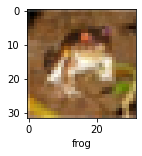

In [14]:
plot_sample(X_train,y_train,0)

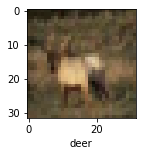

In [15]:
plot_sample(X_train,y_train,3)

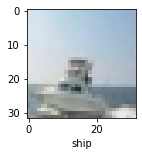

In [16]:
plot_sample(X_train,y_train,100)

### Normalize the Data

In [17]:
X_train=X_train/255.0
X_test=X_test/255.0

### Building Artificial Neural Network

In [20]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 82s 50ms/step - loss: 1.8097 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.6262 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.5427 - accuracy: 0.45420s
Epoch 4/5
1563/1563 [==============================] - 82s 52ms/step - loss: 1.4819 - accuracy: 0.4768
Epoch 5/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.4321 - accuracy: 0.4966


The accuracy of the Artifical Neural Network is 49.66% at the end of 5 epochs

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report:\n",classification_report(y_test,y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.43      0.51      1000
           1       0.66      0.57      0.61      1000
           2       0.45      0.24      0.31      1000
           3       0.38      0.31      0.34      1000
           4       0.52      0.22      0.31      1000
           5       0.32      0.47      0.38      1000
           6       0.59      0.42      0.49      1000
           7       0.36      0.71      0.48      1000
           8       0.49      0.75      0.59      1000
           9       0.55      0.54      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



### Building Convolutional Neural Network

In [24]:
cnn= models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
                  
    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10, activation='softmax')            
])

In [25]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
cnn.fit(X_train, y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 54s 28ms/step - loss: 1.4870 - accuracy: 0.4649
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1241 - accuracy: 0.6052
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9906 - accuracy: 0.6532
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9073 - accuracy: 0.68470s - loss: 0.9074 - accuracy: 0.68
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8478 - accuracy: 0.7044
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7954 - accuracy: 0.7230
Epoch 7/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.7486 - accuracy: 0.7410
Epoch 8/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.7077 - accuracy: 0.7545
Epoch 9/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.6672 - accuracy: 0.7682
Epoch 10/10
1563/1563 [=======

Using CNN the accuracy of the built model is 77.76 at the end of 10 epochs

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9265 - accuracy: 0.6969


[0.9264950156211853, 0.6969000101089478]

In [29]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[1.17324715e-04, 5.20657068e-07, 6.49646565e-04, 9.82547939e-01,
        4.73361579e-05, 8.50199442e-03, 6.28041942e-03, 1.68706483e-05,
        1.83127762e-03, 6.75368983e-06],
       [3.40279122e-03, 1.73436135e-01, 1.05179579e-05, 1.39236154e-05,
        3.47347573e-08, 7.53260743e-09, 2.07287210e-09, 6.50247411e-09,
        8.22804034e-01, 3.32521653e-04],
       [9.22579616e-02, 3.33302289e-01, 1.32218818e-03, 1.76131185e-02,
        8.84865702e-04, 6.41521998e-04, 2.90207507e-04, 1.92166748e-03,
        5.04881620e-01, 4.68845852e-02],
       [9.82072532e-01, 1.58604980e-03, 7.54181994e-03, 2.35097876e-04,
        6.42980856e-04, 5.10540644e-07, 2.50563433e-04, 1.72842840e-06,
        7.56738195e-03, 1.01274920e-04],
       [6.01554984e-06, 2.19253088e-05, 6.09492557e-03, 3.32952514e-02,
        2.36255616e-01, 4.09623235e-03, 7.20193386e-01, 1.88323556e-05,
        1.52130206e-05, 2.62206572e-06]], dtype=float32)

In [30]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [31]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

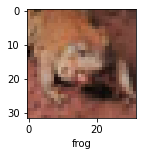

In [32]:
plot_sample(X_test, y_test,5)

In [34]:
classes[y_classes[5]]

'frog'

### Conclusion

* In this notebook we had classified images using Convolutional Neural Network (CNN) and Artificial Neural Network (ANN)
* The accuracy of ANN : 49%
* The accuracy of CNN : 77%